In [ ]:
import pandas as pd

df= pd.read_csv("Crop Production data.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIYA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIYA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIYA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIYA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIYA,2014,Winter,Sesamum,175.0,88.0


In [ ]:
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Number of Columns: 7
Number of Rows: 246091


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [ ]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

des = df.describe().transpose()
des.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.000000,2005.643018,4.952164,1997.000000,2002.000000,2006.000000,2010.000000,2015.000000
Area,246091.000000,12002.820864,50523.404019,0.040000,80.000000,582.000000,4392.000000,8580100.000000
Production,242361.000000,582503.442251,17065813.172410,0.000000,88.000000,729.000000,7023.000000,1250800000.000000


<ipython-input-9-c150208f192a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')
<ipython-input-9-c150208f192a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')
<ipython-input-9-c150208f192a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='viridis')
<ipython-input-9-c150208f192a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

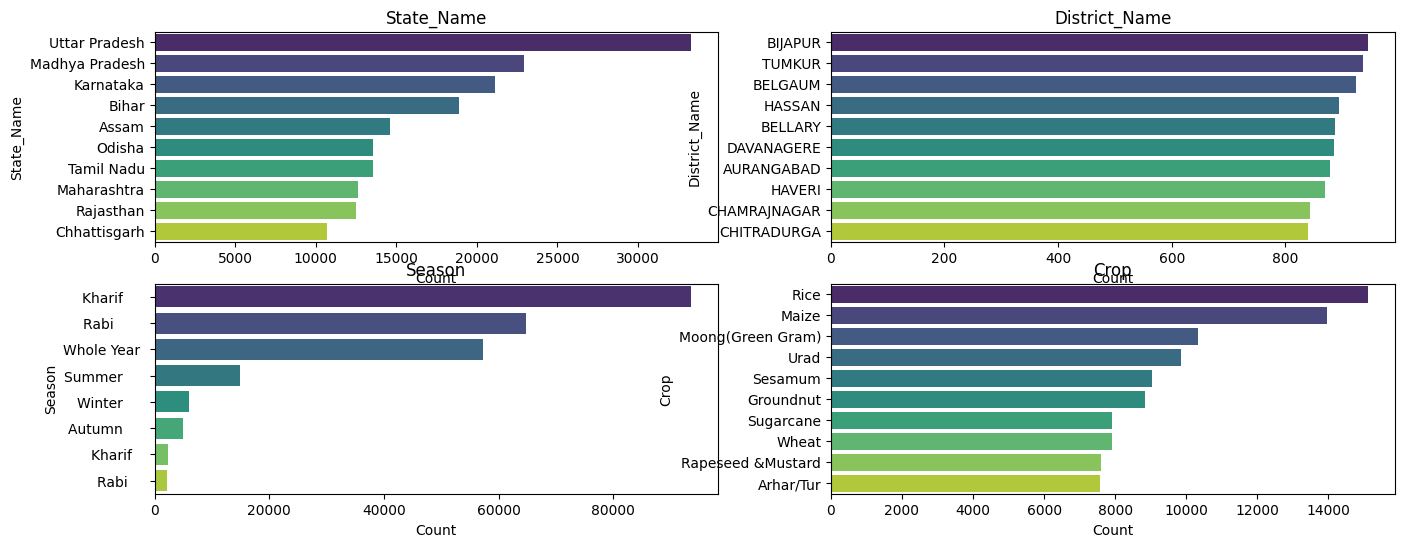

In [ ]:
plt.figure(figsize=(16,6))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(2, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel(f"{feature}")
    plt.xlabel("Count")
plt.show()

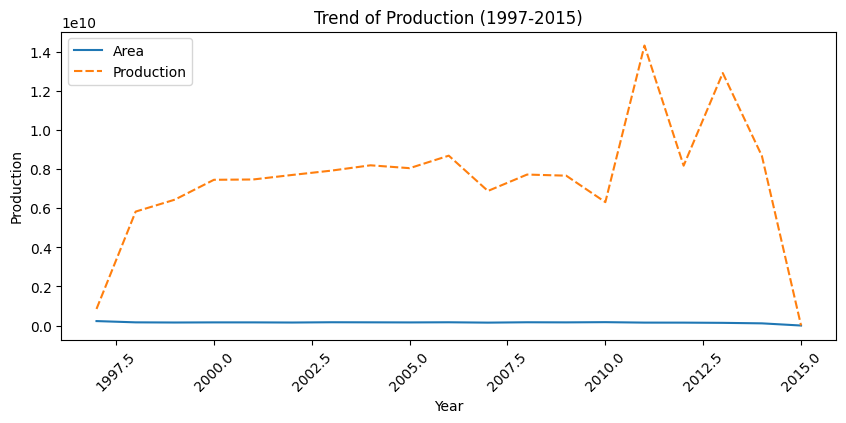

In [ ]:
group_by_year = df.groupby("Crop_Year").sum()

plt.figure(figsize=(10, 4))
sns.lineplot(data=group_by_year)
plt.title('Trend of Production (1997-2015)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-421c540e7bd6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_crop["Crop"], y=group_by_crop["Production"], palette='viridis')


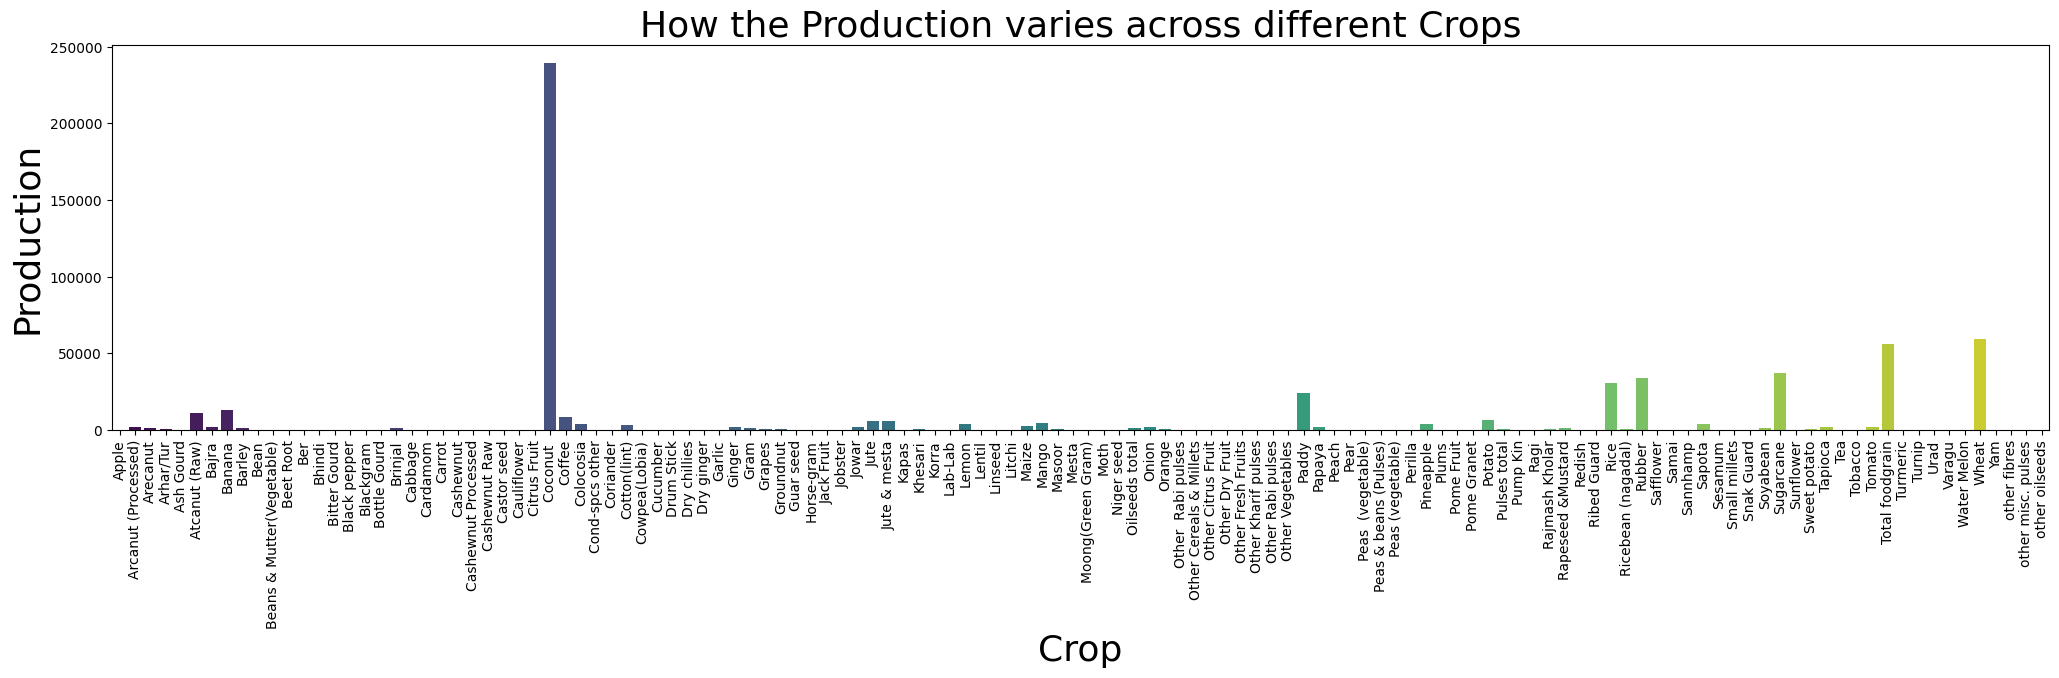

In [ ]:
group_by_crop = df.groupby("Crop")["Production"].median().reset_index()

plt.figure(figsize=(25,5))
sns.barplot(x=group_by_crop["Crop"], y=group_by_crop["Production"], palette='viridis')
plt.title("How the Production varies across different Crops", fontsize=26)
plt.xlabel("Crop", fontsize=26)
plt.ylabel("Production", fontsize=26)
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-389d5b19bf32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_crop["Season"], y=group_by_crop["Production"], palette='viridis')


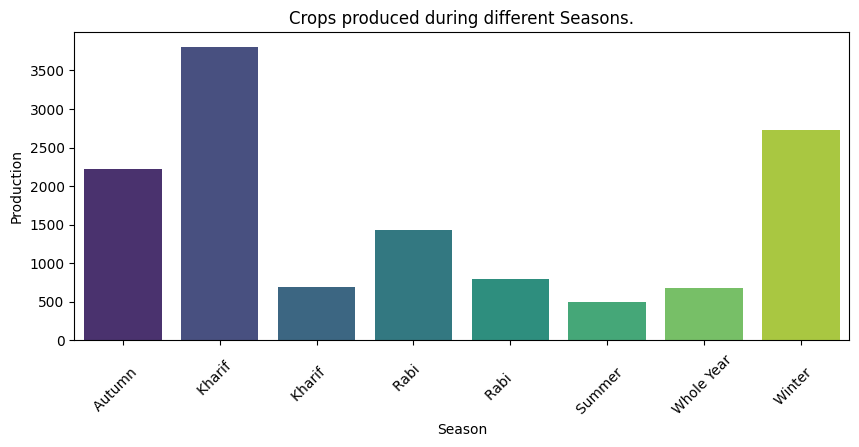

In [ ]:
group_by_crop = df.groupby("Season")["Production"].median().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=group_by_crop["Season"], y=group_by_crop["Production"], palette='viridis')
plt.title("Crops produced during different Seasons.")
plt.xlabel("Season")
plt.ylabel("Production")
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-e6c74681ba1f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_by_crop["District_Name"], y=group_by_crop["Production"], palette='viridis')


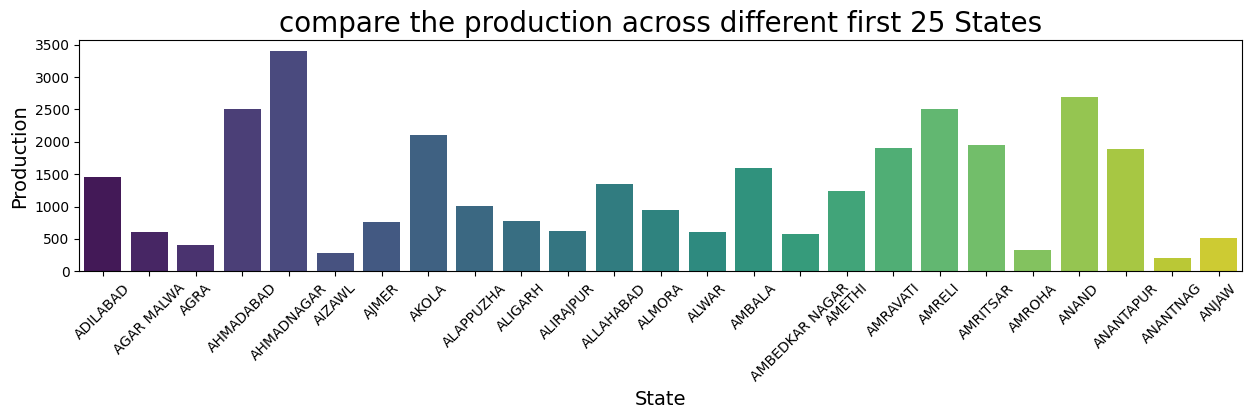

In [ ]:
group_by_crop = df.groupby("District_Name")["Production"].median().reset_index().head(25)

plt.figure(figsize=(15,3))
sns.barplot(x=group_by_crop["District_Name"], y=group_by_crop["Production"], palette='viridis')
plt.title("compare the production across different first 25 States", fontsize=20)
plt.xlabel("State",  fontsize=14)
plt.ylabel("Production",  fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

encoder = LabelEncoder()

df["State_Name"] = encoder.fit_transform(df["State_Name"])
df["District_Name"] = encoder.fit_transform(df["District_Name"])
df["Season"] = encoder.fit_transform(df["Season"])
df["Crop"] = encoder.fit_transform(df["Crop"])

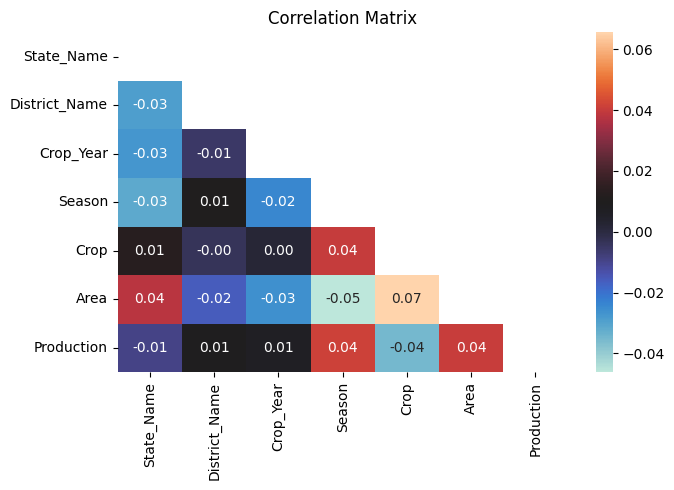

In [ ]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

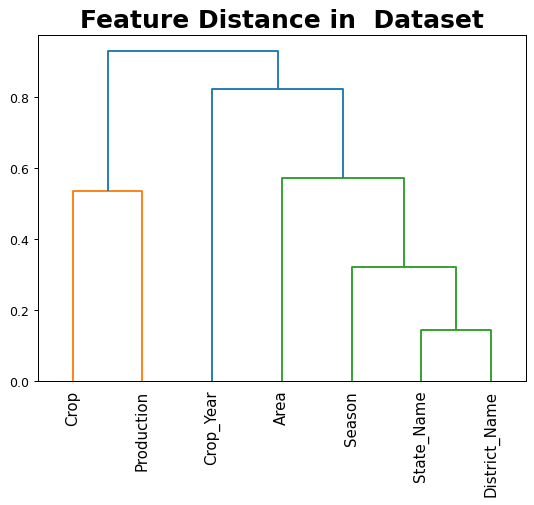

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform


def distance(data, label = ''):
    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')

    plt.figure(figsize = (7,5), dpi = 90)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 20)
    plt.show()

distance(corr)

In [ ]:
df.dropna(inplace=True)

In [ ]:
q1 = df["Area"].quantile(0.25)
q3 = df["Area"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Area"] > lower_limit) & (df["Area"] < upper_limit)]

In [ ]:
X = df.drop("Production", axis=1)
y = df["Production"]

In [ ]:
standard_scaler = StandardScaler()

X = standard_scaler.fit_transform(X)

In [ ]:
min_max_scaler = MinMaxScaler()

y = np.array(y)

y = min_max_scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the numerical features (optional for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and Evaluation for Linear Regression
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - RMSE: {rmse_lr}, R2 Score: {r2_lr}')

# Step 6: Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - RMSE: {rmse_rf}, R2 Score: {r2_rf}')

Linear Regression - RMSE: 0.008433984360404084, R2 Score: 0.006877225166041612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - RMSE: 0.0026443067468873882, R2 Score: 0.9023750049225733


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 8: Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and Evaluation for Decision Tree
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - RMSE: {rmse_dt}, R2 Score: {r2_dt}')


Decision Tree - RMSE: 0.003635961869626676, R2 Score: 0.8154236731690458


In [ ]:
'''import zipfile
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Extract the shapefile from the uploaded ZIP
zip_path = "IND_adm.zip"  # Path to the uploaded zip file
extract_to = "IND_adm_extracted"  # Extraction directory

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the files from the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Step 2: Verify the extracted files
print(f"Extracted files: {os.listdir(extract_to)}")'''



Extracted files: ['IND_adm3.csv', 'IND_adm0.dbf', 'IND_adm2.csv', 'IND_adm1.prj', 'IND_adm2.prj', 'license.txt', 'IND_adm3.prj', 'IND_adm0.shx', 'IND_adm1.shp', 'IND_adm2.shx', 'IND_adm0.cpg', 'IND_adm2.cpg', 'IND_adm2.shp', 'IND_adm3.shx', 'IND_adm0.prj', 'IND_adm3.cpg', 'IND_adm1.cpg', 'IND_adm0.shp', 'IND_adm0.csv', 'IND_adm3.shp', 'IND_adm1.dbf', 'IND_adm1.csv', 'IND_adm1.shx', 'IND_adm2.dbf', 'IND_adm3.dbf']


In [ ]:
'''import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Step 3: Load the shapefile
shapefile_path = os.path.join("IND_adm_extracted", "IND_adm1.shp")
india_states = gpd.read_file(shapefile_path)

print("Shapefile columns:", india_states.columns)  # Verify column names

# Step 4: Clean and Load Dataset (ensure it's loaded properly)
# Example: df = pd.read_csv('your_dataset.csv')
# Assuming your dataset is already loaded into df

# Step 5: Aggregate crop production by state
state_production = df.groupby('State_Name', as_index=False)['Production'].sum()
print("Aggregated production data:\n", state_production.head())

# Step 6: Clean state names in both datasets
india_states['NAME_1'] = india_states['NAME_1'].str.strip().str.lower()
# Convert 'State_Name' column to string before applying string methods
state_production['State_Name'] = state_production['State_Name'].astype(str).str.strip().str.lower()

# Step 7: Merge datasets
merged_gdf = india_states.merge(state_production,
                                left_on='NAME_1',
                                right_on='State_Name',
                                how='left')

print("Merged Data:\n", merged_gdf.head())  # Check the merged result

# Step 8: Check for missing values in the 'Production' column
print("Missing values in Production:", merged_gdf['Production'].isnull().sum())

# Step 9: Plot the data
fig, ax = plt.subplots(figsize=(8,5))

# Fill missing production values with 0 for display
merged_gdf['Production'] = merged_gdf['Production'].fillna(0)

merged_gdf.plot(column='Production', cmap='YlGn', linewidth=0.8,
                ax=ax, edgecolor='0.8', legend=True)

plt.title('Crop Production by State in India', fontsize=15)
plt.show()'''

'import pandas as pd\nimport geopandas as gpd\nimport matplotlib.pyplot as plt\nimport os\n\n# Step 3: Load the shapefile\nshapefile_path = os.path.join("IND_adm_extracted", "IND_adm1.shp")\nindia_states = gpd.read_file(shapefile_path)\n\nprint("Shapefile columns:", india_states.columns)  # Verify column names\n\n# Step 4: Clean and Load Dataset (ensure it\'s loaded properly)\n# Example: df = pd.read_csv(\'your_dataset.csv\')\n# Assuming your dataset is already loaded into df\n\n# Step 5: Aggregate crop production by state\nstate_production = df.groupby(\'State_Name\', as_index=False)[\'Production\'].sum()\nprint("Aggregated production data:\n", state_production.head())\n\n# Step 6: Clean state names in both datasets\nindia_states[\'NAME_1\'] = india_states[\'NAME_1\'].str.strip().str.lower()\n# Convert \'State_Name\' column to string before applying string methods\nstate_production[\'State_Name\'] = state_production[\'State_Name\'].astype(str).str.strip().str.lower()\n\n# Step 7: Merg

In [ ]:
from xgboost import XGBRegressor

# Step 7: XGBoost Regressor Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - RMSE: {rmse_xgb}, R2 Score: {r2_xgb}')


XGBoost - RMSE: 0.002619170672472525, R2 Score: 0.9042221779414412


In [ ]:
from sklearn.ensemble import StackingRegressor

# Step 8: Define the base models for stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

# Define the stacking ensemble with Linear Regression as the final estimator
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Predictions and Evaluation for Stacking Ensemble
y_pred_stack = stacking_model.predict(X_test)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking Ensemble - RMSE: {rmse_stack}, R2 Score: {r2_stack}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stacking Ensemble - RMSE: 0.0026263314433887536, R2 Score: 0.9036977519528533


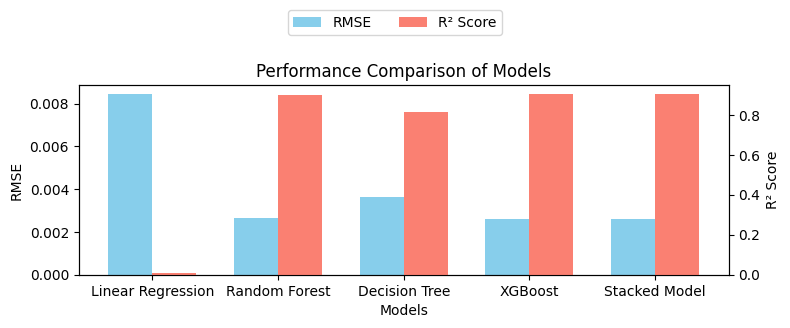

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and corresponding RMSE and R2 scores
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'Stacked Model']
rmse_scores = [rmse_lr, rmse_rf, rmse_dt, rmse_xgb, rmse_stack]
r2_scores = [r2_lr, r2_rf, r2_dt, r2_xgb, r2_stack]

# Plotting
fig, ax1 = plt.subplots(figsize=(8,3))  # Increase figure size

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# RMSE bars
rmse_bars = ax1.bar(index, rmse_scores, bar_width, label='RMSE', color='skyblue')

# Second y-axis for R² scores
ax2 = ax1.twinx()
r2_bars = ax2.bar(index + bar_width, r2_scores, bar_width, label='R²', color='salmon')

# Labels and titles
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')
ax2.set_ylabel('R² Score')
ax1.set_title('Performance Comparison of Models')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)

# Place the legend outside the plot area
fig.legend([rmse_bars, r2_bars], ['RMSE', 'R² Score'], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

# Display plot with a tighter layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for legend space
plt.show()


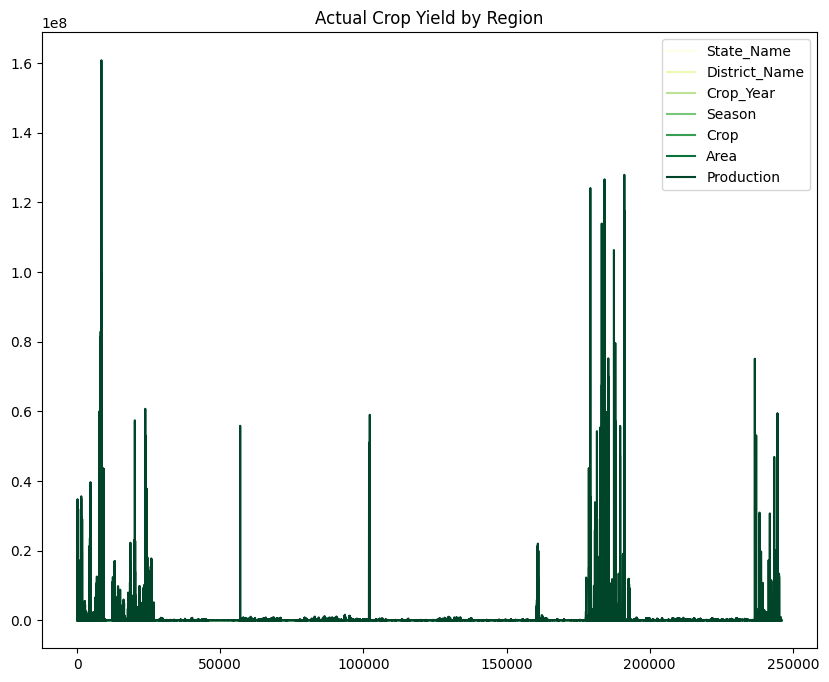

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming `crop_geo_data` is your GeoDataFrame with actual crop yield data by region
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(column="crop_yield", cmap="YlGn", legend=True, ax=ax)
ax.set_title("Actual Crop Yield by Region")
plt.show()


In [ ]:
import pandas as pd

# Define model names and corresponding scores
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'Stacked Model']
rmse_scores = [rmse_lr, rmse_rf, rmse_dt, rmse_xgb, rmse_stack]
r2_scores = [r2_lr, r2_rf, r2_dt, r2_xgb, r2_stack]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'R² Score': r2_scores
})

# Print the table
results_df


,Model,RMSE,R² Score
0,Linear Regression,0.008434,0.006877
1,Random Forest,0.002644,0.902375
2,Decision Tree,0.003636,0.815424
3,XGBoost,0.002619,0.904222
4,Stacked Model,0.002626,0.903698
